## AFFICHER L'**IMAGE**

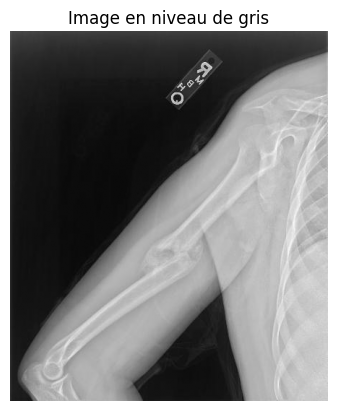

In [ ]:
# --- Importer les bibliothèques ---
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Charger l'image (à adapter avec ton chemin) ---
img_path = "/content/image2_260_png.rf.466727ce49b70acafb3eb753485de111.jpg"
img = cv2.imread(img_path)

# --- Convertir en niveau de gris ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Afficher l'image ---
plt.imshow(gray, cmap='gray')
plt.title("Image en niveau de gris")
plt.axis('off')
plt.show()


## détecter des structures lumineuses ou **sombres** **texte en gras**

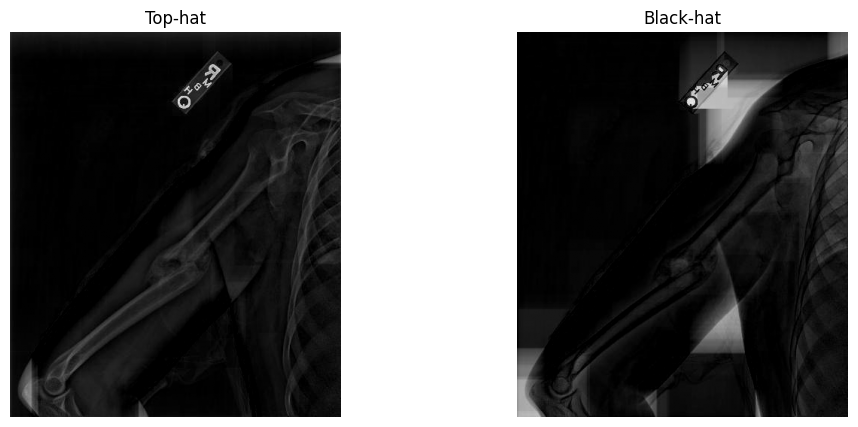

In [ ]:
# Définir un élément structurant
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (75,75))

# Top-hat (structures claires sur fond sombre)
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)

# Black-hat (structures sombres sur fond clair)
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

# Affichage
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(tophat, cmap='gray')
plt.title("Top-hat")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blackhat, cmap='gray')
plt.title("Black-hat")
plt.axis('off')
plt.show()


## détecter les contours nets

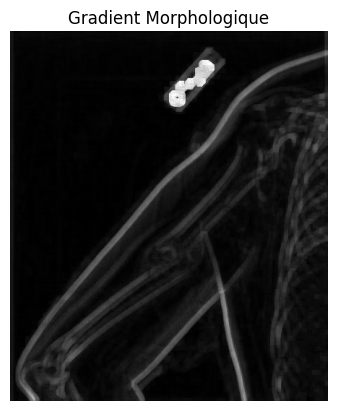

In [ ]:
# Gradient morphologique = dilatation - érosion
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)

plt.imshow(gradient, cmap='gray')
plt.title("Gradient Morphologique")
plt.axis('off')
plt.show()


## supprimer les petits objets et remplir les trous

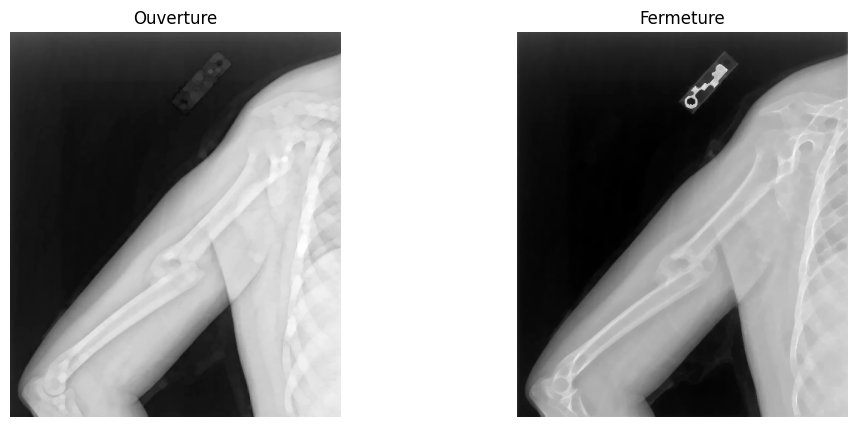

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))

# Ouverture : enlever le bruit
opened = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)

# Fermeture : remplir les petits trous
closed = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(opened, cmap='gray')
plt.title("Ouverture")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(closed, cmap='gray')
plt.title("Fermeture")
plt.axis('off')
plt.show()


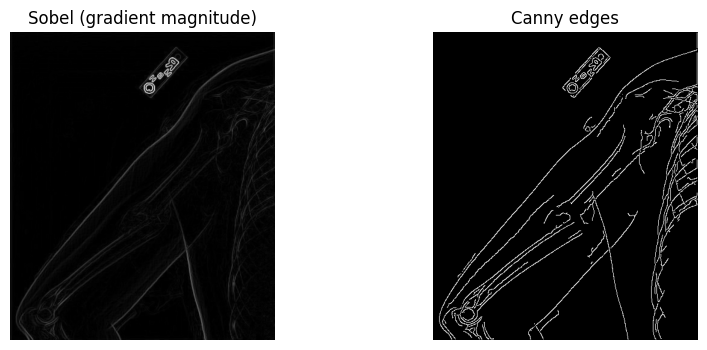

In [ ]:
from skimage.filters import sobel
from skimage.feature import canny # Correct import for canny
from skimage.color import rgb2gray
from skimage.segmentation import active_contour
import numpy as np


# edges_sobel = sobel(g_blur)
edges_sobel = sobel(gray) # Assuming gray is the intended input
# edges_canny = canny(g_blur, sigma=0.8)
edges_canny = canny(gray, sigma=0.8) # Assuming gray is the intended input

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(edges_sobel, cmap='gray'); ax[0].set_title('Sobel (gradient magnitude)'); ax[0].axis('off')
ax[1].imshow(edges_canny, cmap='gray'); ax[1].set_title('Canny edges'); ax[1].axis('off')
plt.show()

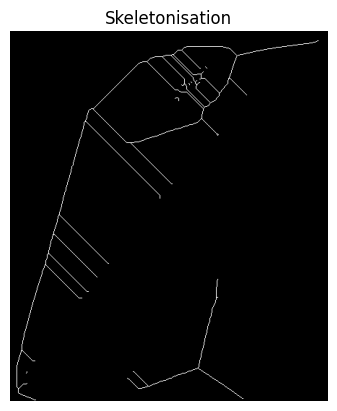

In [ ]:
from skimage.morphology import skeletonize

# Binariser l'image
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Convertir en booléen pour skimage
binary_bool = binary.astype(bool)

# Appliquer la skeletonisation
skeleton = skeletonize(binary_bool)

plt.imshow(skeleton, cmap='gray')
plt.title("Skeletonisation")
plt.axis('off')
plt.show()


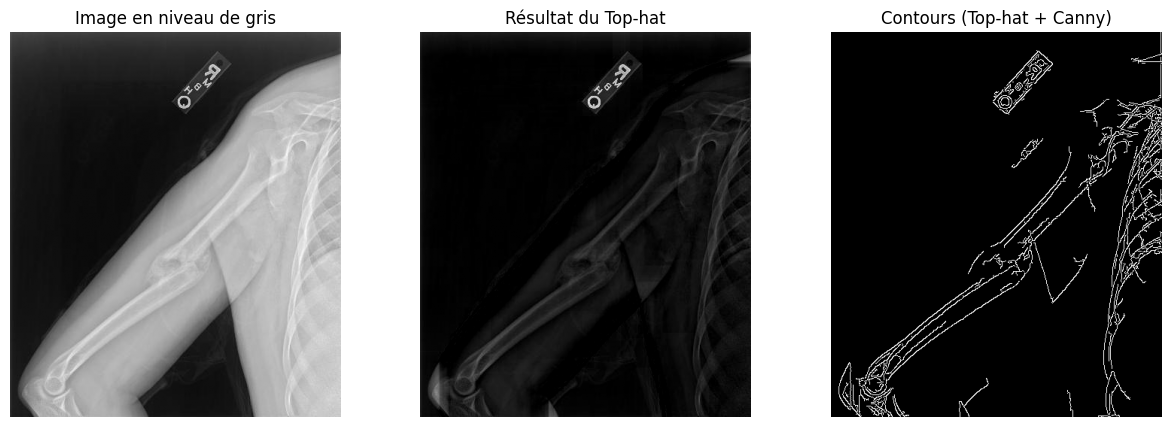

In [ ]:
# --- Importation des bibliothèques ---
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Chargement de l'image ---
# ⚠️ Remplace le chemin par une image de ta dataset
img_path = "/content/image2_260_png.rf.466727ce49b70acafb3eb753485de111.jpg"
img = cv2.imread(img_path)

# --- Conversion en niveau de gris ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Application du filtre Top-hat ---
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (65,65))
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)

# --- Application du détecteur de contours Canny sur l'image Top-hat ---
edges = cv2.Canny(tophat, 30, 100)  # seuils à ajuster selon ton image

# --- Affichage des résultats ---
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Image en niveau de gris")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(tophat, cmap='gray')
plt.title("Résultat du Top-hat")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(edges, cmap='gray')
plt.title("Contours (Top-hat + Canny)")
plt.axis('off')

plt.show()


In [2]:
# --- Importation des bibliothèques ---
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- Chargement de l'image ---
# ⚠️ Remplace le chemin par ton image
img_path = "/content/image1_97_png.rf.0ff8fc618571a7a23dc163c6c716f969.jpg"
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Fonction interactive ---
def process_image(kernel_size=65, canny_min=30, canny_max=100):
    # S'assure que kernel_size est impair
    kernel_size = max(3, kernel_size)
    if kernel_size % 2 == 0:
        kernel_size += 1

    # Filtre Top-hat
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)

    # Détection de contours Canny
    edges = cv2.Canny(tophat, canny_min, canny_max)

    # Affichage
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Image en niveau de gris")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(tophat, cmap='gray')
    plt.title(f"Top-hat (kernel={kernel_size})")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Canny (min={canny_min}, max={canny_max})")
    plt.axis('off')

    plt.show()

# --- Création des sliders interactifs ---
interact(
    process_image,
    kernel_size=IntSlider(min=3, max=101, step=2, value=65, description="Kernel"),
    canny_min=IntSlider(min=0, max=255, step=1, value=30, description="Canny Min"),
    canny_max=IntSlider(min=0, max=255, step=1, value=100, description="Canny Max")
)


interactive(children=(IntSlider(value=65, description='Kernel', max=101, min=3, step=2), IntSlider(value=30, d…

<function __main__.process_image(kernel_size=65, canny_min=30, canny_max=100)>

In [6]:
# --- Importation des bibliothèques ---
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- Chargement de l'image ---
img_path = "/content/image1_657_png.rf.848af89a124da38d80208d712a94b499.jpg"
img = cv2.imread(img_path)

# --- Conversion en niveau de gris ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Création du CLAHE pour uniformiser le contraste ---
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
gray_clahe = clahe.apply(gray)

# --- Fonction interactive ---
def process_image(kernel_size=65, canny_min=30, canny_max=100):
    # S'assure que kernel_size est impair
    kernel_size = max(5, kernel_size)
    if kernel_size % 2 == 0:
        kernel_size += 1

    # Filtre Top-hat
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    tophat = cv2.morphologyEx(gray_clahe, cv2.MORPH_TOPHAT, kernel)

    # Détection de contours Canny
    edges = cv2.Canny(tophat, canny_min, canny_max)

    # Affichage
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Image originale")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(tophat, cmap='gray')
    plt.title(f"Top-hat (kernel={kernel_size})")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Canny (min={canny_min}, max={canny_max})")
    plt.axis('off')

    plt.show()

# --- Création des sliders interactifs ---
interact(
    process_image,
    kernel_size=IntSlider(min=3, max=101, step=2, value=65, description="Kernel"),
    canny_min=IntSlider(min=0, max=255, step=1, value=30, description="Canny Min"),
    canny_max=IntSlider(min=0, max=255, step=1, value=100, description="Canny Max")
)


interactive(children=(IntSlider(value=65, description='Kernel', max=101, min=3, step=2), IntSlider(value=30, d…

<function __main__.process_image(kernel_size=65, canny_min=30, canny_max=100)>

In [7]:
# --- Importation des bibliothèques ---
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- Chargement de l'image (modifie ce chemin pour tester une autre image) ---
img_path = "/content/image1_657_png.rf.848af89a124da38d80208d712a94b499.jpg"
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Fonction pour normaliser l'image ---
def normalize_image(gray):
    norm = (gray - gray.mean()) / (gray.std() + 1e-5) * 128 + 128
    norm = np.clip(norm, 0, 255).astype(np.uint8)
    return norm

gray_norm = normalize_image(gray)

# --- Fonction interactive ---
def process_image(kernel_ratio=0.05, min_kernel=15):
    h, w = gray_norm.shape
    kernel_size = int(max(min_kernel, min(h, w) * kernel_ratio))
    if kernel_size % 2 == 0:
        kernel_size += 1

    # Top-hat
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    tophat = cv2.morphologyEx(gray_norm, cv2.MORPH_TOPHAT, kernel)

    # Canny adaptatif
    median_val = np.median(tophat)
    sigma = 0.33
    lower = int(max(0, (1.0 - sigma) * median_val))
    upper = int(min(255, (1.0 + sigma) * median_val))
    edges = cv2.Canny(tophat, lower, upper)

    # Affichage
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Image originale")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(tophat, cmap='gray')
    plt.title(f"Top-hat (kernel={kernel_size})")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Canny adaptatif (lower={lower}, upper={upper})")
    plt.axis('off')
    plt.show()

# --- Création des sliders interactifs ---
interact(
    process_image,
    kernel_ratio=IntSlider(min=1, max=20, step=1, value=5, description="Kernel %"),
    min_kernel=IntSlider(min=3, max=51, step=2, value=15, description="Min Kernel")
)


interactive(children=(IntSlider(value=5, description='Kernel %', max=20, min=1), IntSlider(value=15, descripti…

<function __main__.process_image(kernel_ratio=0.05, min_kernel=15)>